In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


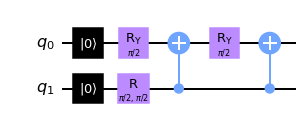

In [10]:
import math

desired_state = [0,1 / math.sqrt(2),1 / math.sqrt(2),0]
qc = QuantumCircuit(2)
qc.initialize(desired_state, [0,1])
qc.decompose().decompose().decompose().decompose().decompose().draw()





In [15]:
### Basics
from qiskit import QuantumCircuit
qc= QuantumCircuit(8)

In [16]:
qc.measure_all()
qc.h(1)

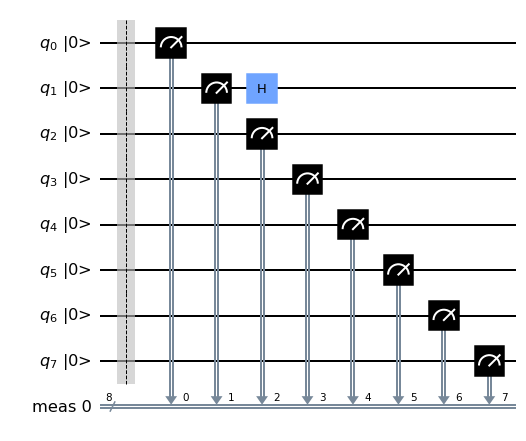

In [17]:
qc.draw(initial_state = True)

In [ ]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)

### Creating an Adder Circui

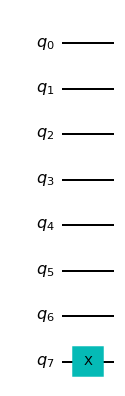

In [19]:
qc_encoder = QuantumCircuit(8)
qc_encoder.x(7)
qc_encoder.draw()


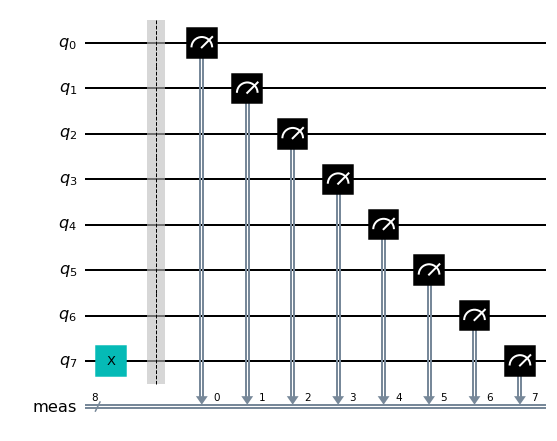

In [21]:
##results
qc_encoder.measure_all()
qc_encoder.draw()

In [8]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_encoder).result()
counts = result.get_counts()
plot_histogram(counts)

Traceback (most recent call last):
  Input In [8] in <cell line: 4>
    result = sim.run(qc_encoder).result()
NameError: name 'qc_encoder' is not defined

Use %tb to get the full traceback.


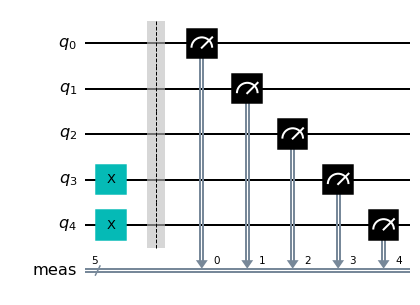

In [31]:
## my age encoder
qc_age = QuantumCircuit(5)
qc_age.x([3,4])
qc_age.measure_all()
qc_age.draw()

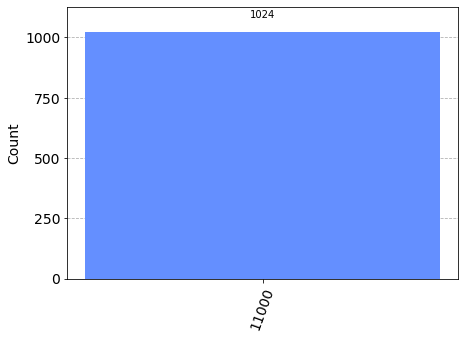

In [29]:
result = sim.run(qc_age).result()
counts = result.get_counts()
plot_histogram(counts)

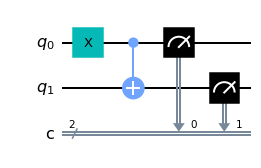

In [32]:
qc = QuantumCircuit(2,2)
qc.x(0)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

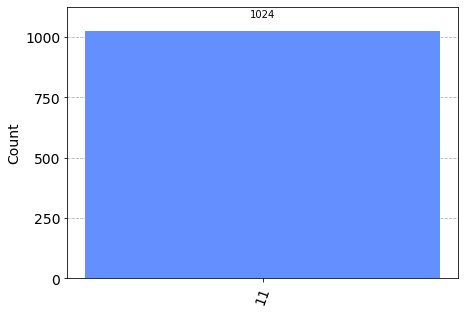

In [33]:
result = sim.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)

## Half adder implementation

### 2 bit adder

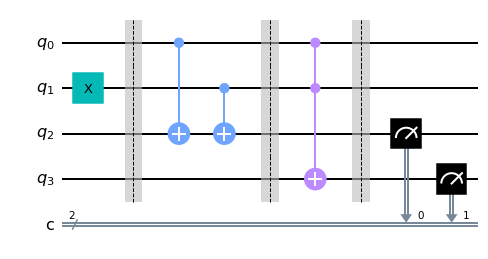

In [56]:


qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
# qc_ha.x(0) # For a=0, remove this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.barrier()

# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,3)
qc_ha.barrier()

# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1)



qc_ha.draw()

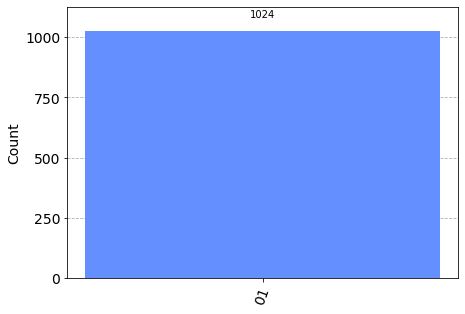

In [57]:
result = sim.run(qc_ha).result()
counts = result.get_counts()
plot_histogram(counts)

### 3 bit adder

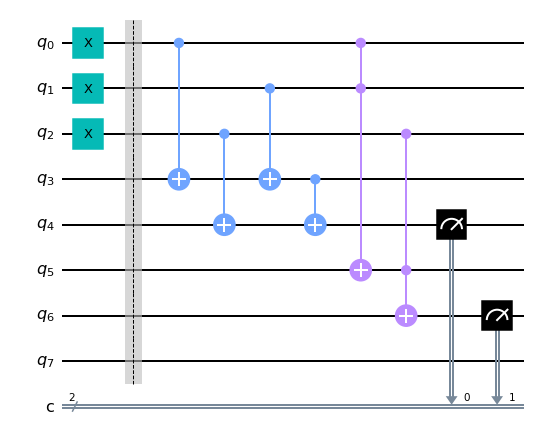

In [26]:
# Preparing Quantum Circuit
qc_ha3 = QuantumCircuit(8,2)

## preparing 2 bit addder
qc_ha3.x(0)
qc_ha3.x(1)
qc_ha3.x(2)
qc_ha3.barrier()

# use cnots to write the XOR of the inputs on qubit 2
qc_ha3.cx(0,3)
qc_ha3.cx(1,3)



#preapring 3bit adder
#XORing 3rd qubit 
qc_ha3.cx(2,4)
qc_ha3.cx(3,4)

# apply Toffoli gate to the input qubits to implement the AND logic
qc_ha3.ccx(0,1,5)
qc_ha3.ccx(2,5,6)

#readout
qc_ha3.measure(4,0)
qc_ha3.measure(6,1)


#draw
qc_ha3.draw()





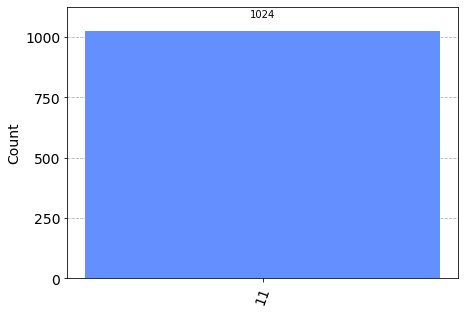

In [27]:
result = sim.run(qc_ha3).result()
counts = result.get_counts()
plot_histogram(counts)